In [19]:
import tensorflow as tf
import keras as kr
import sklearn as sk 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("C:\\sebin\\lab\\ecg2\\git\\ecg_data_wfdb")

from use.mitbih_ecg.form import ecg_segment 
from use.segment.open import toDataframe_interval,all_check
from use.tensor.input import to_mixmax_tensor


In [248]:
import os
from pathlib import Path

In [205]:
from sklearn.preprocessing import MinMaxScaler

In [206]:
scaler = MinMaxScaler()

In [207]:
scaler

MinMaxScaler()

In [8]:
import os

In [14]:
model_name = "C:\\sebin\\lab\\ecg2\\git\\ecg_data_wfdb\\model\\07_\\0308\\rDuration_Kfold40_80_sameData\\model0_train90.h5"

In [114]:
data_path = "C:\\sebin\\lab\\ecg2\\data\\segment\\15_lead2_aami_L360_R180_baselineRemove_rrInterval\\files\\108"

In [49]:
segment_path = data_path+"\\"+"ann\\N"

In [50]:
segment_path

'C:\\sebin\\lab\\ecg2\\data\\segment\\15_lead2_aami_L360_R180_baselineRemove_rrInterval\\files\\108\\\\ann\\N'

In [51]:
interval_path = data_path+"\\"+"interval\\interval.csv"

In [52]:
interval_path

'C:\\sebin\\lab\\ecg2\\data\\segment\\15_lead2_aami_L360_R180_baselineRemove_rrInterval\\files\\108\\\\interval\\interval.csv'

In [249]:
data_file = sorted(Path(segment_path).iterdir(), key=os.path.getmtime)

In [250]:
data_file

[WindowsPath('C:/sebin/lab/ecg2/data/segment/15_lead2_aami_L360_R180_baselineRemove_rrInterval/files/108/ann/N/108_0.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/segment/15_lead2_aami_L360_R180_baselineRemove_rrInterval/files/108/ann/N/108_1.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/segment/15_lead2_aami_L360_R180_baselineRemove_rrInterval/files/108/ann/N/108_3.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/segment/15_lead2_aami_L360_R180_baselineRemove_rrInterval/files/108/ann/N/108_4.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/segment/15_lead2_aami_L360_R180_baselineRemove_rrInterval/files/108/ann/N/108_5.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/segment/15_lead2_aami_L360_R180_baselineRemove_rrInterval/files/108/ann/N/108_6.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/segment/15_lead2_aami_L360_R180_baselineRemove_rrInterval/files/108/ann/N/108_7.csv'),
 WindowsPath('C:/sebin/lab/ecg2/data/segment/15_lead2_aami_L360_R180_baselineRemove_rrInterval/files/108/ann/N/108_8.csv'),
 Windows

In [117]:
model = kr.models.load_model("..\\model0_original.h5")

In [118]:
model.load_weights("..\\model0_train90.h5")

------------------

In [119]:
interval = pd.read_csv(interval_path)

In [120]:
interval

,0,1
0,0.969,0.893
1,0.986,0.974
2,0.919,0.967
3,0.503,0.921
4,0.256,0.845
...,...,...
1747,0.833,0.831
1748,0.819,0.829
1749,0.831,0.828
1750,0.847,0.832


In [121]:
interval = interval.to_numpy().flatten()

In [122]:
interval = interval.reshape(-1,2)

In [123]:
interval

array([[0.969, 0.893],
       [0.986, 0.974],
       [0.919, 0.967],
       ...,
       [0.831, 0.828],
       [0.847, 0.832],
       [0.856, 0.839]])

In [124]:
all_interval = interval

In [125]:
all_interval.shape

(1752, 2)

----

In [171]:
index = 1

In [175]:
data_file[index]

'108_1.csv'

In [176]:
num = data_file[index].split("_")[1]

In [177]:
num

'1.csv'

In [178]:
num = num.split(".csv")[0]

In [179]:
num

'1'

In [180]:
d = pd.read_csv(segment_path+"\\"+data_file[index])

In [181]:
d

,0
0,-0.385
1,-0.39
2,-0.415
3,-0.435
4,-0.43
...,...
536,0.065
537,0.13
538,0.22
539,0.255


In [182]:
d = d.to_numpy()

In [183]:
data = d[0:-1]

In [184]:
data = data.flatten()

In [185]:
data

array(['-0.385', '-0.39', '-0.415', '-0.435', '-0.43', '-0.385', '-0.36',
       '-0.365', '-0.375', '-0.385', '-0.42', '-0.505', '-0.57', '-0.62',
       '-0.62', '-0.635', '-0.635', '-0.645', '-0.68', '-0.725', '-0.765',
       '-0.785', '-0.82', '-0.825', '-0.86', '-0.895', '-0.93', '-0.96',
       '-0.98', '-0.985', '-0.985', '-0.94', '-0.895', '-0.88', '-0.85',
       '-0.78', '-0.69', '-0.625', '-0.6', '-0.575', '-0.54', '-0.485',
       '-0.435', '-0.37', '-0.335', '-0.335', '-0.32', '-0.305', '-0.305',
       '-0.305', '-0.32', '-0.33', '-0.34', '-0.315', '-0.29', '-0.275',
       '-0.28', '-0.295', '-0.295', '-0.285', '-0.27', '-0.265', '-0.26',
       '-0.275', '-0.265', '-0.27', '-0.275', '-0.275', '-0.27', '-0.27',
       '-0.26', '-0.265', '-0.255', '-0.25', '-0.265', '-0.27', '-0.26',
       '-0.245', '-0.255', '-0.26', '-0.25', '-0.25', '-0.225', '-0.215',
       '-0.215', '-0.22', '-0.225', '-0.22', '-0.195', '-0.21', '-0.21',
       '-0.21', '-0.205', '-0.21', '-0.205'

In [186]:
data = data.astype(float)

In [187]:
ann = d[-1]

In [188]:
ann 

array(['N'], dtype=object)

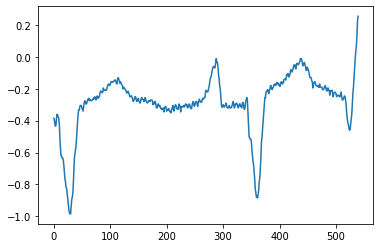

In [189]:
plt.plot(data)

In [190]:
num = int(num)

In [191]:
num

1

In [192]:
interval = all_interval[num]

In [193]:
interval

array([0.986, 0.974])

In [194]:
len(data)

540

In [195]:
data.shape

(540,)

In [196]:
data = data.reshape(1,540)

In [220]:
data

array([[-0.385, -0.39 , -0.415, -0.435, -0.43 , -0.385, -0.36 , -0.365,
        -0.375, -0.385, -0.42 , -0.505, -0.57 , -0.62 , -0.62 , -0.635,
        -0.635, -0.645, -0.68 , -0.725, -0.765, -0.785, -0.82 , -0.825,
        -0.86 , -0.895, -0.93 , -0.96 , -0.98 , -0.985, -0.985, -0.94 ,
        -0.895, -0.88 , -0.85 , -0.78 , -0.69 , -0.625, -0.6  , -0.575,
        -0.54 , -0.485, -0.435, -0.37 , -0.335, -0.335, -0.32 , -0.305,
        -0.305, -0.305, -0.32 , -0.33 , -0.34 , -0.315, -0.29 , -0.275,
        -0.28 , -0.295, -0.295, -0.285, -0.27 , -0.265, -0.26 , -0.275,
        -0.265, -0.27 , -0.275, -0.275, -0.27 , -0.27 , -0.26 , -0.265,
        -0.255, -0.25 , -0.265, -0.27 , -0.26 , -0.245, -0.255, -0.26 ,
        -0.25 , -0.25 , -0.225, -0.215, -0.215, -0.22 , -0.225, -0.22 ,
        -0.195, -0.21 , -0.21 , -0.21 , -0.205, -0.21 , -0.205, -0.185,
        -0.18 , -0.17 , -0.175, -0.18 , -0.175, -0.16 , -0.155, -0.155,
        -0.16 , -0.155, -0.155, -0.15 , -0.145, -0.145, -0.155, 

In [214]:
re_data = scaler.fit(data.reshape(-1,1))

In [216]:
re_data = re_data.transform(data.reshape(-1,1))

In [217]:
re_data

array([[0.48387097],
       [0.47983871],
       [0.45967742],
       [0.44354839],
       [0.44758065],
       [0.48387097],
       [0.50403226],
       [0.5       ],
       [0.49193548],
       [0.48387097],
       [0.45564516],
       [0.38709677],
       [0.33467742],
       [0.29435484],
       [0.29435484],
       [0.28225806],
       [0.28225806],
       [0.27419355],
       [0.24596774],
       [0.20967742],
       [0.17741935],
       [0.16129032],
       [0.13306452],
       [0.12903226],
       [0.10080645],
       [0.07258065],
       [0.04435484],
       [0.02016129],
       [0.00403226],
       [0.        ],
       [0.        ],
       [0.03629032],
       [0.07258065],
       [0.08467742],
       [0.10887097],
       [0.16532258],
       [0.23790323],
       [0.29032258],
       [0.31048387],
       [0.33064516],
       [0.35887097],
       [0.40322581],
       [0.44354839],
       [0.49596774],
       [0.52419355],
       [0.52419355],
       [0.53629032],
       [0.548

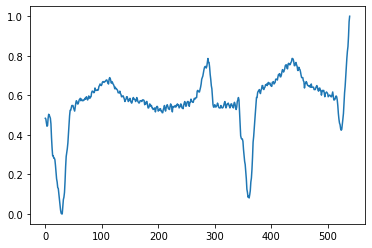

In [218]:
plt.plot(re_data)

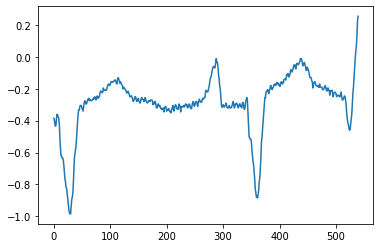

In [221]:
plt.plot(data.reshape(-1))

In [222]:
data.shape

(1, 540)

In [223]:
interval = interval.reshape(1,-1)

In [224]:
interval

array([[0.986, 0.974]])

In [225]:
interval.shape

(1, 2)

In [230]:
re_data

array([[0.48387097],
       [0.47983871],
       [0.45967742],
       [0.44354839],
       [0.44758065],
       [0.48387097],
       [0.50403226],
       [0.5       ],
       [0.49193548],
       [0.48387097],
       [0.45564516],
       [0.38709677],
       [0.33467742],
       [0.29435484],
       [0.29435484],
       [0.28225806],
       [0.28225806],
       [0.27419355],
       [0.24596774],
       [0.20967742],
       [0.17741935],
       [0.16129032],
       [0.13306452],
       [0.12903226],
       [0.10080645],
       [0.07258065],
       [0.04435484],
       [0.02016129],
       [0.00403226],
       [0.        ],
       [0.        ],
       [0.03629032],
       [0.07258065],
       [0.08467742],
       [0.10887097],
       [0.16532258],
       [0.23790323],
       [0.29032258],
       [0.31048387],
       [0.33064516],
       [0.35887097],
       [0.40322581],
       [0.44354839],
       [0.49596774],
       [0.52419355],
       [0.52419355],
       [0.53629032],
       [0.548

In [231]:
re_data.shape

(540, 1)

In [232]:
re_data = re_data.reshape(-1,540)

In [233]:
re_data

array([[0.48387097, 0.47983871, 0.45967742, 0.44354839, 0.44758065,
        0.48387097, 0.50403226, 0.5       , 0.49193548, 0.48387097,
        0.45564516, 0.38709677, 0.33467742, 0.29435484, 0.29435484,
        0.28225806, 0.28225806, 0.27419355, 0.24596774, 0.20967742,
        0.17741935, 0.16129032, 0.13306452, 0.12903226, 0.10080645,
        0.07258065, 0.04435484, 0.02016129, 0.00403226, 0.        ,
        0.        , 0.03629032, 0.07258065, 0.08467742, 0.10887097,
        0.16532258, 0.23790323, 0.29032258, 0.31048387, 0.33064516,
        0.35887097, 0.40322581, 0.44354839, 0.49596774, 0.52419355,
        0.52419355, 0.53629032, 0.5483871 , 0.5483871 , 0.5483871 ,
        0.53629032, 0.52822581, 0.52016129, 0.54032258, 0.56048387,
        0.57258065, 0.56854839, 0.55645161, 0.55645161, 0.56451613,
        0.5766129 , 0.58064516, 0.58467742, 0.57258065, 0.58064516,
        0.5766129 , 0.57258065, 0.57258065, 0.5766129 , 0.5766129 ,
        0.58467742, 0.58064516, 0.58870968, 0.59

In [234]:
re_data.shape

(1, 540)

In [235]:
result = model.predict([re_data,interval])

In [236]:
result

array([[1.00000000e+00, 1.07506936e-20, 4.96149443e-16]], dtype=float32)

In [237]:
np.argmax(result)

0

---------------------

In [264]:
all_result = []

C:\sebin\lab\ecg2\data\segment\15_lead2_aami_L360_R180_baselineRemove_rrInterval\files\108\ann\N\108_0.csv
C:\sebin\lab\ecg2\data\segment\15_lead2_aami_L360_R180_baselineRemove_rrInterval\files\108\ann\N\108_0.csv
0
[0.969 0.893]
--------------------------------
[[1.000000e+00 3.465431e-13 8.821062e-09]]
0
C:\sebin\lab\ecg2\data\segment\15_lead2_aami_L360_R180_baselineRemove_rrInterval\files\108\ann\N\108_1.csv
C:\sebin\lab\ecg2\data\segment\15_lead2_aami_L360_R180_baselineRemove_rrInterval\files\108\ann\N\108_1.csv
1
[0.986 0.974]
--------------------------------
[[1.00000000e+00 1.07506936e-20 4.96149443e-16]]
0
C:\sebin\lab\ecg2\data\segment\15_lead2_aami_L360_R180_baselineRemove_rrInterval\files\108\ann\N\108_3.csv
C:\sebin\lab\ecg2\data\segment\15_lead2_aami_L360_R180_baselineRemove_rrInterval\files\108\ann\N\108_3.csv
3
[0.503 0.921]
--------------------------------
[[9.9877924e-01 1.4264741e-13 1.2207936e-03]]
0
C:\sebin\lab\ecg2\data\segment\15_lead2_aami_L360_R180_baselineRemo

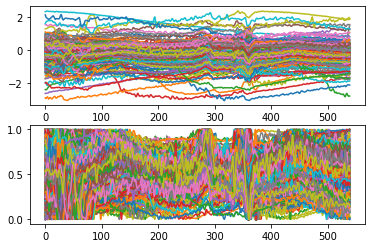

In [265]:
for index in range(len(data_file)):
    print(data_file[index])

    file_path = str(data_file[index])
    print(file_path)
    num = file_path.split("\\")[-1]
    num = num.split(".csv")[0]
    num = num.split("_")[-1]

    print(num)

    d = pd.read_csv(file_path)
    d = d.to_numpy()
    data = d[0:-1]
    data = data.flatten()
    data = data.astype(float)

    #print(data)

    ann = d[-1]
    #print(ann)

    plt.subplot(2,1,1)
    plt.plot(data)

    num = int(num)
    #print(num)

    interval = all_interval[num]
    print(interval)

    data = data.reshape(1,540)
    re_data = scaler.fit(data.reshape(-1,1))
    re_data = re_data.transform(data.reshape(-1,1))
    re_data = re_data.reshape(-1,540)
    #print(re_data)
    #print(re_data.shape)
    plt.subplot(2,1,2)
    plt.plot(re_data.flatten())

    interval = interval.reshape(1,-1)
    #print(interval)
    #print(interval.shape)


    print("--------------------------------")
    result = model.predict([re_data,interval])
    real_result = np.argmax(result)
    print(result)
    print(real_result)

    all_result.append([num,real_result])
    print("================================")



In [266]:
all_result

[[0, 0],
 [1, 0],
 [3, 0],
 [4, 0],
 [5, 2],
 [6, 0],
 [7, 2],
 [8, 0],
 [9, 2],
 [10, 0],
 [11, 2],
 [12, 2],
 [13, 2],
 [14, 0],
 [15, 0],
 [16, 0],
 [17, 0],
 [18, 2],
 [19, 0],
 [21, 0],
 [22, 2],
 [23, 0],
 [24, 0],
 [25, 0],
 [26, 2],
 [27, 0],
 [28, 2],
 [29, 2],
 [30, 2],
 [31, 0],
 [32, 0],
 [33, 2],
 [34, 2],
 [35, 2],
 [36, 2],
 [37, 2],
 [38, 0],
 [39, 2],
 [40, 0],
 [41, 0],
 [42, 0],
 [43, 0],
 [44, 2],
 [45, 0],
 [46, 0],
 [47, 0],
 [48, 2],
 [49, 2],
 [50, 0],
 [51, 2],
 [52, 2],
 [53, 0],
 [54, 0],
 [55, 0],
 [56, 0],
 [57, 0],
 [58, 2],
 [59, 2],
 [60, 0],
 [61, 0],
 [62, 0],
 [63, 0],
 [64, 2],
 [65, 0],
 [66, 0],
 [67, 0],
 [68, 0],
 [69, 0],
 [70, 0],
 [71, 0],
 [72, 0],
 [73, 0],
 [74, 2],
 [75, 2],
 [76, 0],
 [77, 2],
 [78, 0],
 [79, 0],
 [80, 2],
 [81, 0],
 [82, 0],
 [83, 0],
 [84, 0],
 [85, 0],
 [86, 0],
 [87, 2],
 [88, 0],
 [89, 2],
 [90, 0],
 [91, 2],
 [92, 0],
 [93, 0],
 [94, 0],
 [95, 0],
 [96, 0],
 [97, 2],
 [98, 0],
 [99, 0],
 [100, 0],
 [101, 0],
 [102, 

In [271]:
cnt = 0
for i in range(len(all_result)):
    if(all_result[i][1]!=0):
        print(all_result[i][0],"\t",all_result[i][1])
        cnt+=1

5 	 2
7 	 2
9 	 2
11 	 2
12 	 2
13 	 2
18 	 2
22 	 2
26 	 2
28 	 2
29 	 2
30 	 2
33 	 2
34 	 2
35 	 2
36 	 2
37 	 2
39 	 2
44 	 2
48 	 2
49 	 2
51 	 2
52 	 2
58 	 2
59 	 2
64 	 2
74 	 2
75 	 2
77 	 2
80 	 2
87 	 2
89 	 2
91 	 2
97 	 2
132 	 2
226 	 2
271 	 2
412 	 2
413 	 2
422 	 2
425 	 2
591 	 2
637 	 2
709 	 2
755 	 2
756 	 2
760 	 2
761 	 2
762 	 2
763 	 2
764 	 2
766 	 2
767 	 2
768 	 2
769 	 2
770 	 2
771 	 2
772 	 2
773 	 2
860 	 2
861 	 2
957 	 2
1115 	 2
1130 	 2
1136 	 2
1150 	 2
1156 	 2
1172 	 2
1593 	 2
1597 	 2
1598 	 1
1623 	 2
1639 	 2
1650 	 2
1661 	 2
1662 	 2


In [272]:
print(len(all_result))

1729


In [270]:
print(cnt)

76


In [273]:
(len(all_result)-cnt)/len(all_result)

0.9560439560439561